In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import seaborn as sns
import matplotlib.pyplot as plt
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Remove warning from the notebook
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
#upload the data 
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
#read the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<h1>Data Exploration</h1>

In [3]:
#samples from the dataset
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
250,1,1,3191,1993,1799,1730,234,710
21,1,3,5567,871,2010,3383,375,569
370,2,3,39679,3944,4955,1364,523,2235
334,2,2,16823,928,2743,11559,332,3486
398,1,3,11442,1032,582,5390,74,247


In [4]:
df.describe()
#gives statistical summary of data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
#no.of rows and columns
df.shape

(440, 8)

Dataset has 440 rows and 8 columns

<h3>Tidying the Data</h3>

In [8]:
# Null values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
# Check for duplicated data
df.duplicated().any()

False

In [10]:
# drop uneccessary columns
#drop channel and region to remail with just the products 
df.drop(["Channel","Region"], axis=1,inplace = True)

In [11]:
# confirm remaining rows
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185



<h3>EDA</h3>
<h4>Univariate Analysis</h4>

<p>Univariate analysis is the simplest form of data analysiswhere the data being analyzed contains only one variable. 
Since it's a single variable it doesn’t deal with causes or relationships.
The main purpose of univariate analysis is to describe the data and find patterns that exist within it.<p>


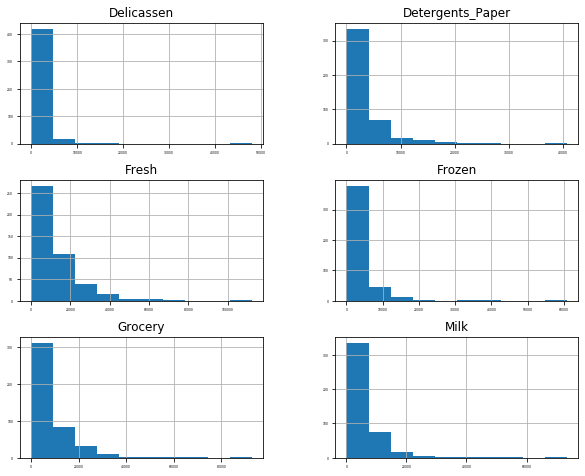

In [12]:
# histograms
df.hist(figsize=(10,8), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()

All columns have data that are skewed to the right


<h3>Multivariate Analysis</h3>

No handles with labels found to put in legend.


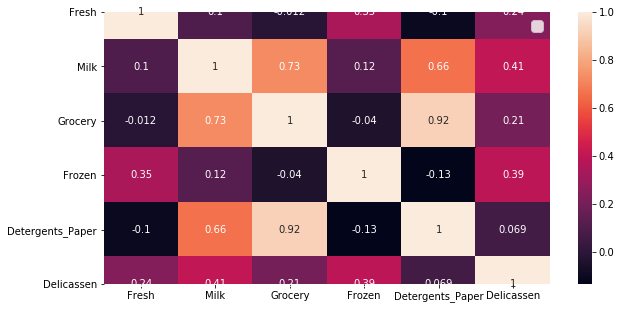

In [14]:
# Display the correlation heatmap
corr = df.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

The scatter matrix below may not show any correlation between features.

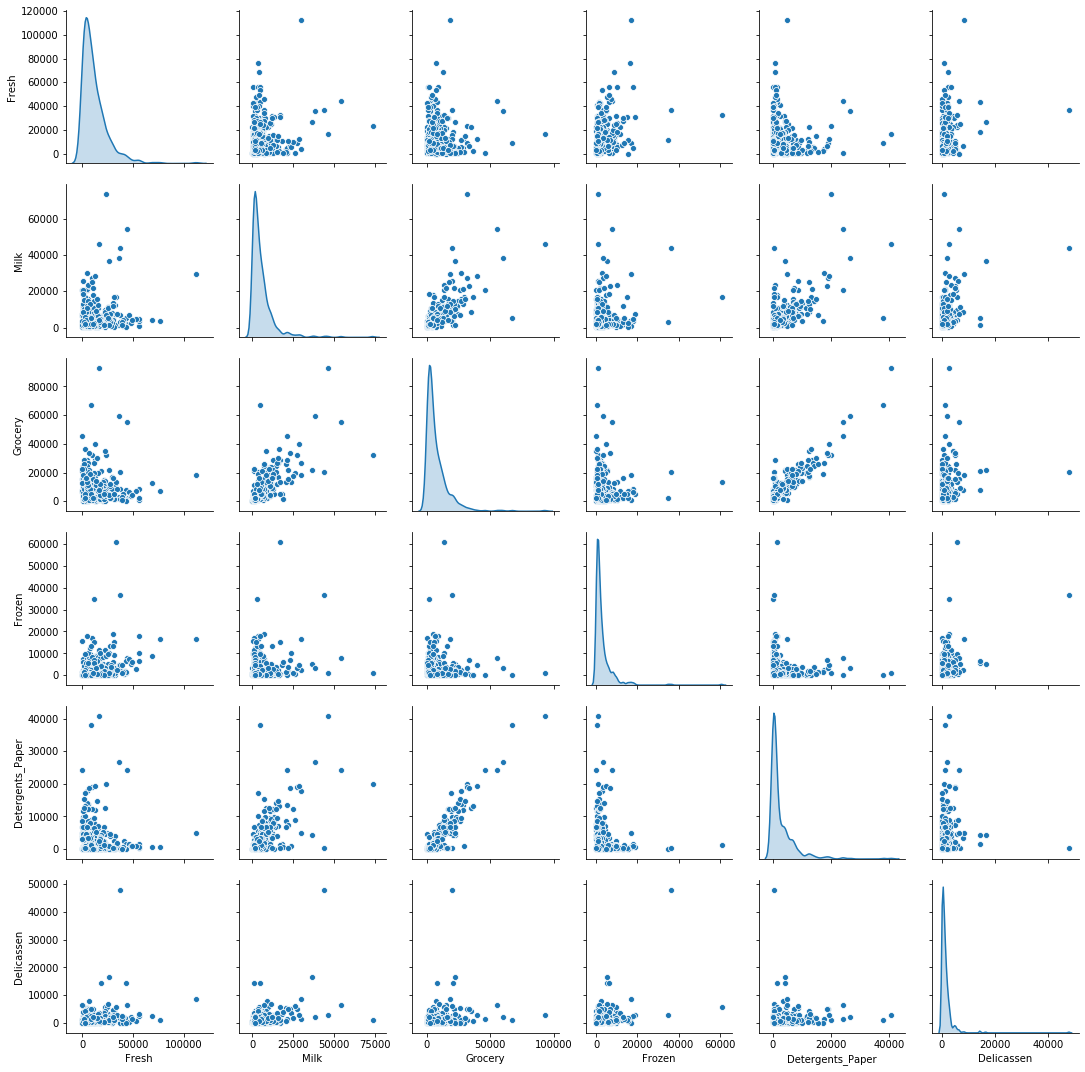

In [15]:
# pairplot
sns.pairplot(df, diag_kind = 'kde')

    Grocery and Detergents_Paper are positively related
    Milk and Grocery are also related

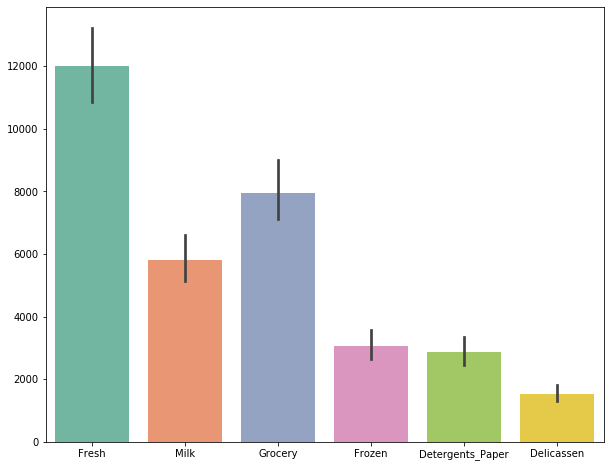

In [16]:
plt.figure(figsize = (10,8))
_ = sns.barplot(data=df, palette="Set2")

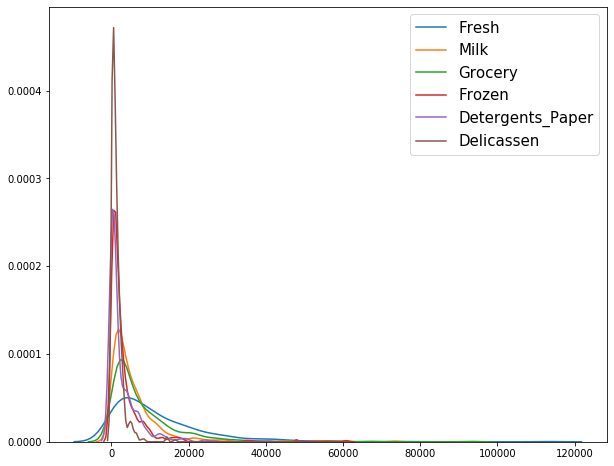

In [17]:
plt.figure(figsize = (10,8))

for cols in df.columns.values:
    ax = sns.kdeplot(df[cols])
    ax.legend(loc=0, prop={'size': 15})

<h3>Data Prepation</h3>
<h1>Normalization</h1>

If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply normalization. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:

Assign a copy of the data to log_data after applying logarithmic scaling. Use the np.log function for this.

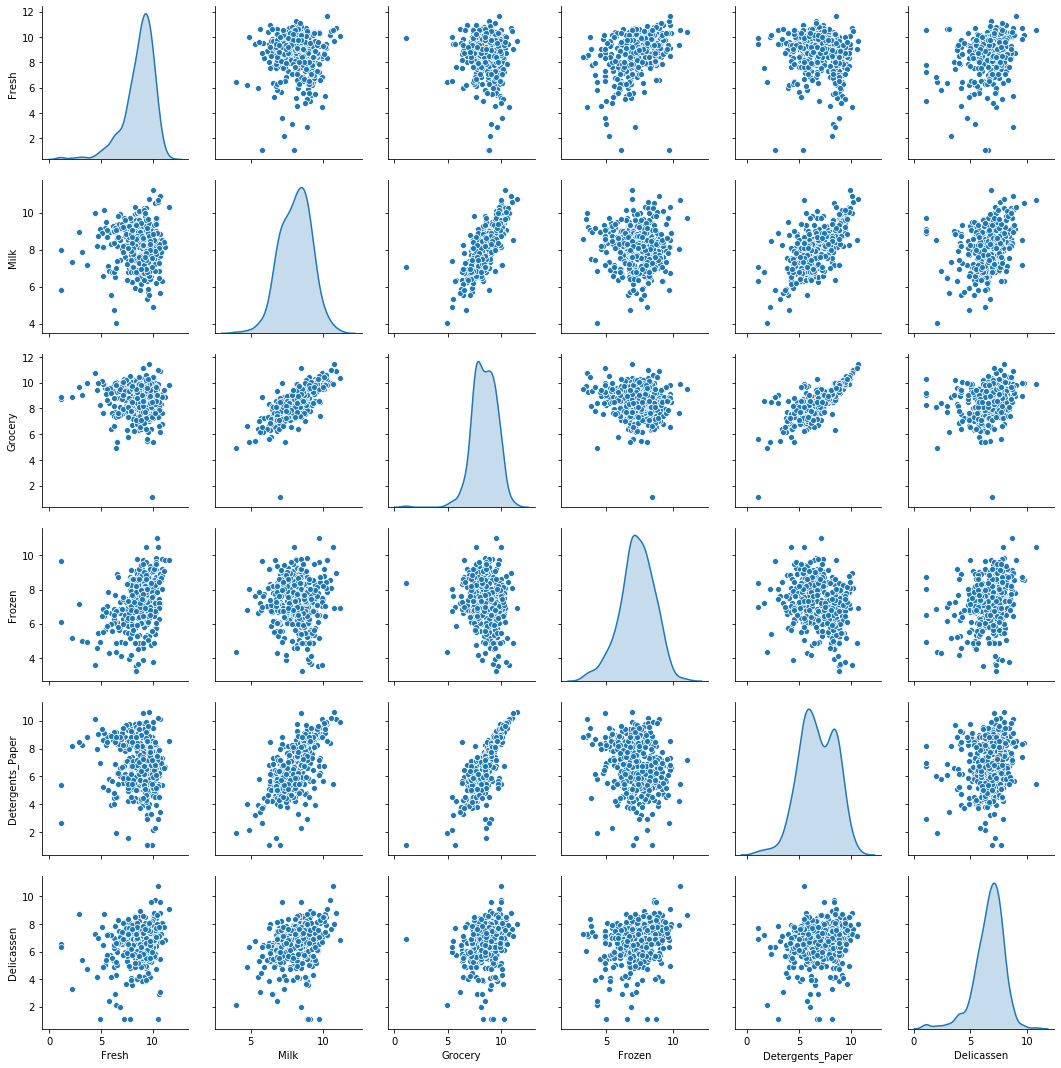

In [18]:
# Scale the data using the natural logarithm
log_data = np.log(df)

# Produce a scatter matrix for each pair of newly-transformed features
_ = sns.pairplot(log_data, diag_kind = 'kde')

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before)


<h2>Standardization</h2>

Our dataset has a lot of variation in the magnitude of the data. Some variables havelow magnitude, while others have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude using standard scaler

when standardizing it makes the assumption that the dataset is bell_shaped(normalized)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(log_data)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-1.862147e-16,-3.691492e-16,-2.556036e-16,1.826822e-16,1.396610e-16,6.550316e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-5.162332e+00,-3.808515e+00,-6.585828e+00,-3.181814e+00,-3.308406e+00,-4.251391e+00
25%,-4.616414e-01,-7.277472e-01,-6.875511e-01,-5.391077e-01,-7.200844e-01,-4.989215e-01
50%,2.149246e-01,6.953960e-02,2.322023e-02,2.259570e-02,-4.709210e-02,1.584857e-01
75%,6.808223e-01,7.030903e-01,7.468678e-01,6.815637e-01,8.658021e-01,6.427625e-01
max,1.959605e+00,2.855165e+00,2.687964e+00,2.895443e+00,2.228613e+00,3.140996e+00


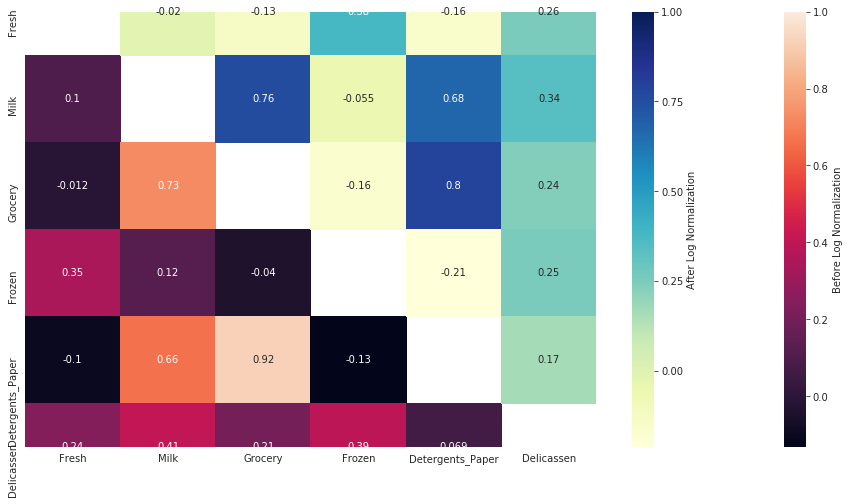

In [21]:
# Display the correlation heatmap
log_corr = log_data.corr()

f = plt.figure(figsize = (16,8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax1 = sns.heatmap(corr, annot=True, mask=mask, cbar_kws={'label': 'Before Log Normalization'})

mask2 = np.zeros_like(corr)
mask2[np.tril_indices_from(mask2)] = True
with sns.axes_style("white"):
    ax2 = sns.heatmap(log_corr, annot=True, mask=mask2, cmap="YlGnBu", cbar_kws={'label': 'After Log Normalization'})

After normalizing the data, correlations between the features have changed a little which is evident from the above visualization.

<h3>Modelling</h3>

<h1>K-means</h1>

The K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(scaled_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(scaled_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

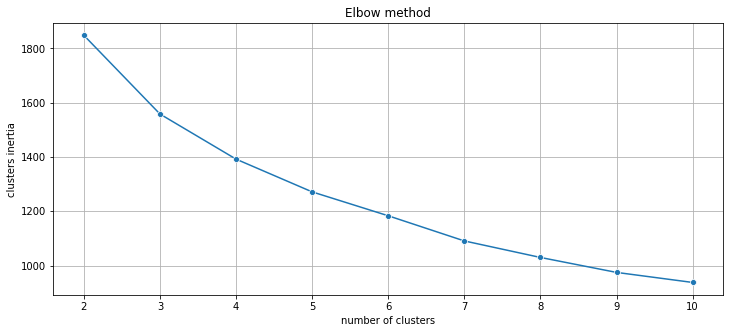

In [23]:
# Find the suitable number of k
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
plt.grid()
plt.show()

In [24]:
ps = pd.DataFrame(scaled_df)
ps.head()

,0,1,2,3,4,5
0,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


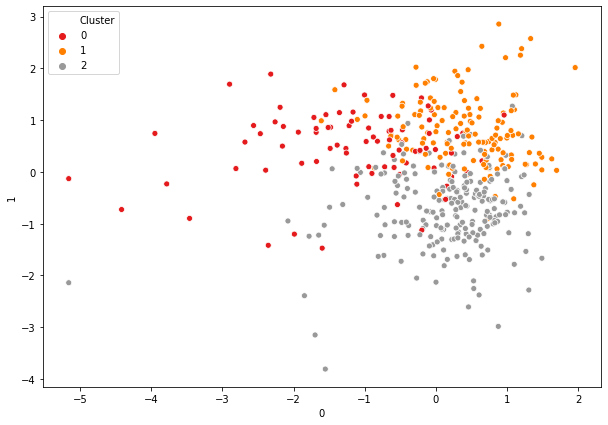

In [25]:
# K=3
km3 = KMeans(n_clusters=3, init='k-means++').fit(ps) # initialise and fit K-Means model

KM3_clustered = ps.copy()
KM3_clustered.loc[:,'Cluster'] = km3.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,figsize=(10,7))


scat_1 = sns.scatterplot(0, 1, data=KM3_clustered,
                hue='Cluster', ax=axes, palette='Set1', legend='full')

plt.show()

In [26]:
# Sizes of the clusters:
clust_sizes = KM3_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,81
1,146
2,213


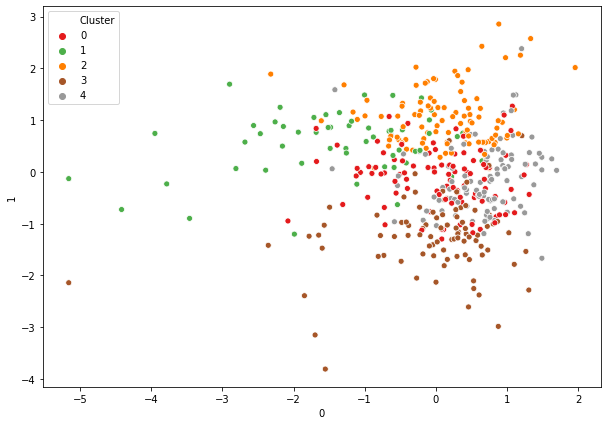

In [27]:
# K=5
km5 = KMeans(n_clusters=5, init='k-means++').fit(ps) # initialise and fit K-Means model

KM5_clustered = ps.copy()
KM5_clustered.loc[:,'Cluster'] = km5.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,figsize=(10,7))
scat_1 = sns.scatterplot(0, 1, data=KM5_clustered,
                hue='Cluster', ax=axes, palette='Set1', legend='full')

plt.show()

In [28]:
# Sizes of the clusters:
clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,97
1,54
2,100
3,90
4,99


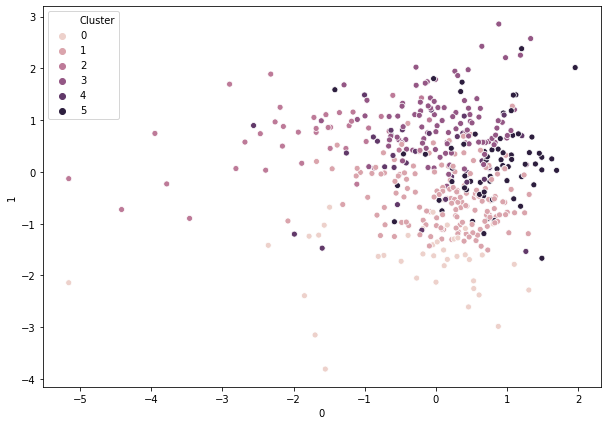

In [32]:
# K=6
km6 = KMeans(n_clusters=6, init='k-means++').fit(ps) # initialise and fit K-Means model

KM6_clustered = ps.copy()
KM6_clustered.loc[:,'Cluster'] = km6.labels_ # append labels to points
fig1, (axes) = plt.subplots(1,figsize=(10,7))


scat_1 = sns.scatterplot(0, 1, data=KM6_clustered,
                hue='Cluster', ax=axes, legend='full')
plt.show()

In [33]:
# Sizes of the clusters:
clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
clust_sizes.columns = ["KM_size"]
clust_sizes

,KM_size
Cluster,
0,40
1,154
2,39
3,107
4,31
5,69



Hierarchical clustering

Unlike KMeans which needs to be told about the number of clusters to make, hierarchical clustering doesn't need that. It produces a tree like representation of the data that informs the number of clusters and the observations falling in those clusters. This tree like structure is called a dendrogram. Here, we will discuss agglomerative clustering which is indicated by an upside down tree. As we move up this tree, leaves start to fuse/merge together into braches indicating that these are similar observations. As we move higher up, braches or banches and leaves start merging. The sooner these leaves/branches merge, more similar these observations are

    In agglomerative clustering, each observation is initially considered as a cluster of its own (leaf). Then the most similar clusters are successively merged until there is just one single big cluster (root).



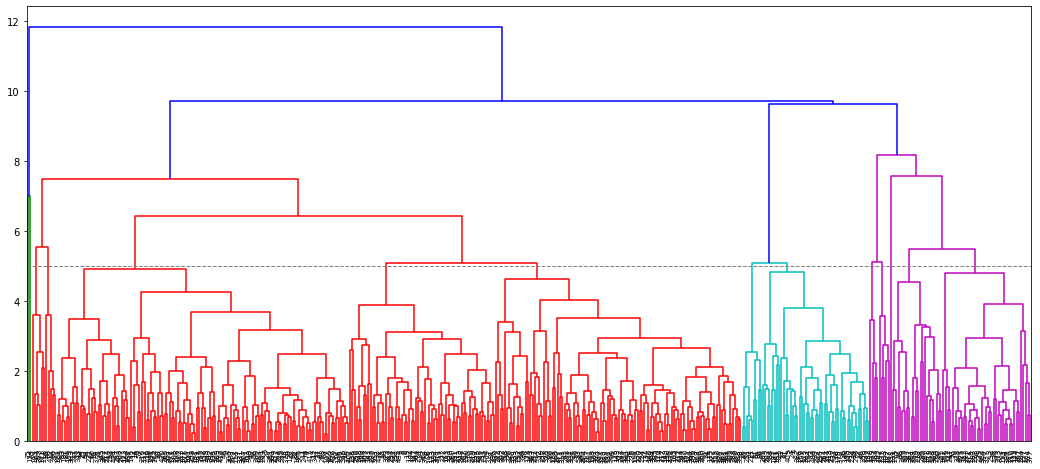

In [34]:
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
fig, ax= plt.subplots(figsize=(18,8))
mergings=linkage(ps,method='complete')
dendrogram(mergings,  leaf_rotation=90,leaf_font_size=7)
plt.axhline(y=5, c='grey', lw=1, linestyle='dashed')
plt.show()

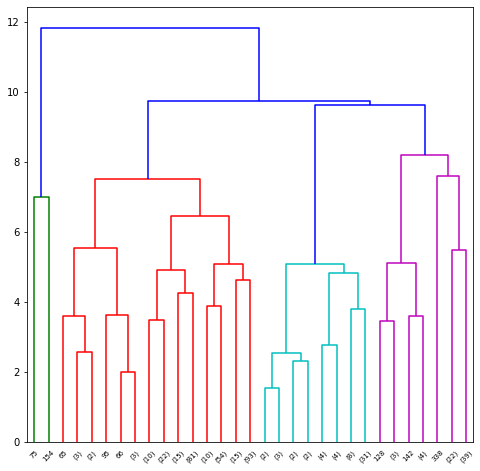

In [35]:
fig, ax= plt.subplots(figsize=(8,8))
dendrogram(mergings, truncate_mode = 'level', p=5,leaf_font_size=7)
plt.show()